## KNN Classifier

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('breast_cancer_bd.csv')
print("Shape of the data: ", df.shape)
print("Columns: ", df.columns)

Shape of the data:  (699, 11)
Columns:  Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')


In [92]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [93]:
#drop redundant columns
#drop Sample code number as it is not useful
df.drop('Sample code number', axis=1, inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [94]:
#convert Bare Nuclei from object to int64 deleting all non-numeric values
df['Bare Nuclei'] = df['Bare Nuclei'].apply(lambda x: int(x) if str(x).isnumeric() else np.nan)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump Thickness              699 non-null    int64  
 1   Uniformity of Cell Size      699 non-null    int64  
 2   Uniformity of Cell Shape     699 non-null    int64  
 3   Marginal Adhesion            699 non-null    int64  
 4   Single Epithelial Cell Size  699 non-null    int64  
 5   Bare Nuclei                  683 non-null    float64
 6   Bland Chromatin              699 non-null    int64  
 7   Normal Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


Class is the target variable, the others are features.

In [95]:
df.isnull().sum()

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [96]:
# view frequency distribution of values in `Class` variable

df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [97]:

#Find frequency distribution of values in `Class` variable
df['Class'].value_counts() / np.float(len(df))

2    0.655222
4    0.344778
Name: Class, dtype: float64

2 --> benign \
4 --> malign

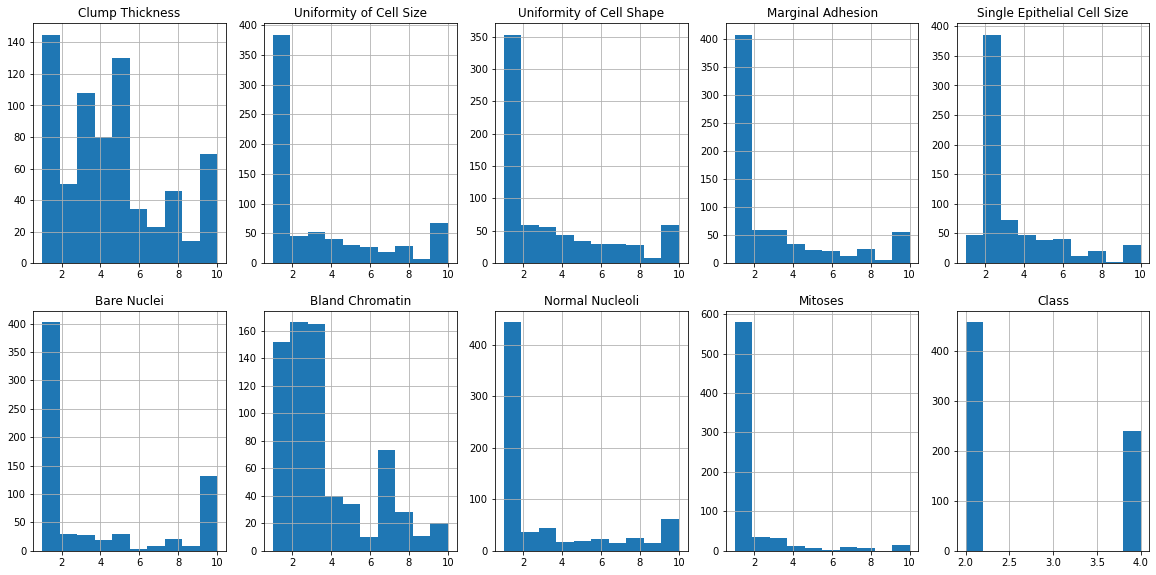

Description of df:        Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
count           699.00                   699.00                    699.00   
mean              4.42                     3.13                      3.21   
std               2.82                     3.05                      2.97   
min               1.00                     1.00                      1.00   
25%               2.00                     1.00                      1.00   
50%               4.00                     1.00                      1.00   
75%               6.00                     5.00                      5.00   
max              10.00                    10.00                     10.00   

       Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
count             699.00                       699.00       683.00   
mean                2.81                         3.22         3.54   
std                 2.86                         2.21         3.64   
min    

In [98]:
#Check the presence of outliers
plt.figure(figsize=(20,15))
for i, feature in enumerate(df.columns):
    plt.subplot(3, 5, i+1)
    df[feature].hist()
    plt.title(feature)
    #y axis: number of samples
    #x axis: feature value
    #plt.ylabel('Number of samples')
    #plt.xlabel(feature)

plt.show()

print("Description of df:", round(df.describe(), 2))


In [99]:
print("Max value of each feature: ", df.max())
print("\n\n")
print("Min value of each feature: ", df.min())
print("\n\n")

Max value of each feature:  Clump Thickness                10.0
Uniformity of Cell Size        10.0
Uniformity of Cell Shape       10.0
Marginal Adhesion              10.0
Single Epithelial Cell Size    10.0
Bare Nuclei                    10.0
Bland Chromatin                10.0
Normal Nucleoli                10.0
Mitoses                        10.0
Class                           4.0
dtype: float64



Min value of each feature:  Clump Thickness                1.0
Uniformity of Cell Size        1.0
Uniformity of Cell Shape       1.0
Marginal Adhesion              1.0
Single Epithelial Cell Size    1.0
Bare Nuclei                    1.0
Bland Chromatin                1.0
Normal Nucleoli                1.0
Mitoses                        1.0
Class                          2.0
dtype: float64





Thee values seem already normalized.

In [100]:
print("Mean value of each feature: ", df.mean())

Mean value of each feature:  Clump Thickness                4.417740
Uniformity of Cell Size        3.134478
Uniformity of Cell Shape       3.207439
Marginal Adhesion              2.806867
Single Epithelial Cell Size    3.216023
Bare Nuclei                    3.544656
Bland Chromatin                3.437768
Normal Nucleoli                2.866953
Mitoses                        1.589413
Class                          2.689557
dtype: float64


Compute the Pearson's correlation coefficient

In [101]:
#Class is the target variable, so the Pearson correlation coefficient of the features with the target variable is calculated
corr = df.corr()
corr['Class'].sort_values(ascending=False)

Class                          1.000000
Bare Nuclei                    0.822696
Uniformity of Cell Shape       0.818934
Uniformity of Cell Size        0.817904
Bland Chromatin                0.756616
Clump Thickness                0.716001
Normal Nucleoli                0.712244
Marginal Adhesion              0.696800
Single Epithelial Cell Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

Correlation HeatMap with Seaborn

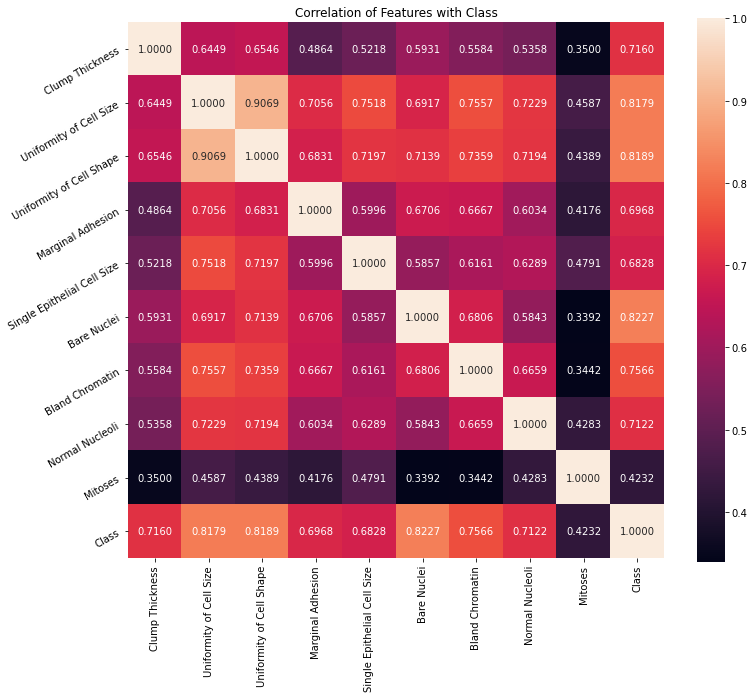

In [102]:
plt.figure(figsize=(12, 10))
plt.title('Correlation of Features with Class')
m = sns.heatmap(corr, square=True, annot=True, fmt='.4f', linecolor='white')
m.set_xticklabels(m.get_xticklabels(), rotation=90)
m.set_yticklabels(m.get_yticklabels(), rotation=30)

plt.show()

Replace the sixteen missing values in Bare Nucei column

In [103]:
#there are 16 missing values in the Bare Nuclei column
#use MEDIAN IMPUTATION to fill missing values

df["Bare Nuclei"].fillna(df["Bare Nuclei"].median(), inplace=True)

print("Number of missing values in the dataset: ", df.isnull().sum())

Number of missing values in the dataset:  Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [104]:
#Train Test Split
from sklearn.model_selection import train_test_split

x = df.drop('Class', axis=1) #features
y = df['Class'] #target variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Apply Standard Scaler for Normalization

In [105]:
#Use standard scaler to scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train) #fit_transform on training data
#now apply the transformation on test data
x_test = scaler.transform(x_test)

#get them back as dataframes
x_train = pd.DataFrame(x_train, columns=x.columns)
x_test = pd.DataFrame(x_test, columns=x.columns)

In [106]:
x_train.shape, x_test.shape

((489, 9), (210, 9))

In [107]:
x_train.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,1.232031,2.257370,2.245488,1.503389,2.999016,1.719954,1.387388,0.049397,3.939748
1,0.166981,2.257370,2.245488,2.576611,2.999016,-0.436604,2.576925,2.365662,5.163334
2,-1.253085,-0.717087,-0.769275,-0.643055,-0.556181,-0.706173,-0.198662,-0.612392,-0.342804
3,-0.543052,-0.386592,-0.434301,0.072426,-0.556181,-0.167034,-0.198662,-0.612392,-0.342804
4,0.166981,2.257370,2.245488,0.072426,2.110217,-0.706173,0.594363,2.365662,0.880782


In [108]:
x_test.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,-1.253085,-0.717087,-0.434301,-0.643055,-0.111782,-0.706173,-0.991687,-0.612392,-0.342804
1,-0.188035,-0.717087,-0.769275,-0.643055,-0.556181,-0.706173,-0.595174,-0.612392,-0.342804
2,-0.543052,-0.717087,-0.769275,-0.643055,-0.556181,-0.706173,-0.198662,-0.612392,-0.342804
3,0.166981,0.604894,0.570620,1.145648,-0.111782,1.719954,-0.198662,-0.612392,-0.342804
4,-0.543052,-0.717087,-0.769275,-0.643055,-0.556181,-0.706173,-0.198662,-0.612392,-0.342804


## USE KNN Classifier - EUCLIDEAN DISTANCE

In [109]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

#auto: EUCLEDIAN DISTANCE
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [110]:
y_pred = knn.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy: ", accuracy_score(y_test, y_pred))

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.9666666666666667
Confusion Matrix: 
 [[141   2]
 [  5  62]]
Classification Report: 
               precision    recall  f1-score   support

           2       0.97      0.99      0.98       143
           4       0.97      0.93      0.95        67

    accuracy                           0.97       210
   macro avg       0.97      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210



Comparison between Model Accuracy and Null Accuracy

In [111]:
c = y_test.value_counts()
c

2    143
4     67
Name: Class, dtype: int64

In [112]:
#Most frequent class is class 2 with 143 samples

#Calculate Null Accuracy
null_accuracy = c.max() / c.sum()
null_accuracy

0.680952380952381

So, the default version of the KNN Classifier wins against Null Accuracy by having an accuracy of 96.7% vs 68.1%